**Portfolio for Data Science Apple Quality**

The point of this notebook is to keep track of the different useful libraries, packages and particular functions that I know of. <br>
Date of creation : 06.03.2024 <br>
Last update : 07.03.2024

In [364]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For regression
from statsmodels.formula.api import ols

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn import naive_bayes
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

**Exploratory Data Analysis (EDA)**

In [365]:
data = pd.read_csv('apple_quality.csv')
data.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


In [366]:
data.shape

(4001, 9)

In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [368]:
data['Quality'].unique()

array(['good', 'bad', nan], dtype=object)

We notice that Acidity and Quality are both objects. In the case of acidity, it displays numbers, we thus wanna turn this into floats most likely. For the quality, it is boolean, 'good' and 'bad', that we will turn into 1 and 0 by one hot encoding. We also seem to have some missing values. Time to duplicate the dataset to modify it.

In [369]:
df = data.copy()
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [370]:
df = df.dropna(axis=0)


In [371]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [372]:
df.shape

(4000, 9)

In [373]:
df['Acidity'] = df['Acidity'].astype(float)
df = pd.get_dummies(df, prefix='Quality', drop_first=True)

In [374]:
df.dtypes

A_id            float64
Size            float64
Weight          float64
Sweetness       float64
Crunchiness     float64
Juiciness       float64
Ripeness        float64
Acidity         float64
Quality_good      uint8
dtype: object

In [375]:
df.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_good
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


**Data Analysis**<br>
Now, we can start doing some data analysis. We do suspect a high correlation between sweetness and acidity, as they are perceived as opposites. Let's check, if it's the case, we should create a variable that summarize the two there.

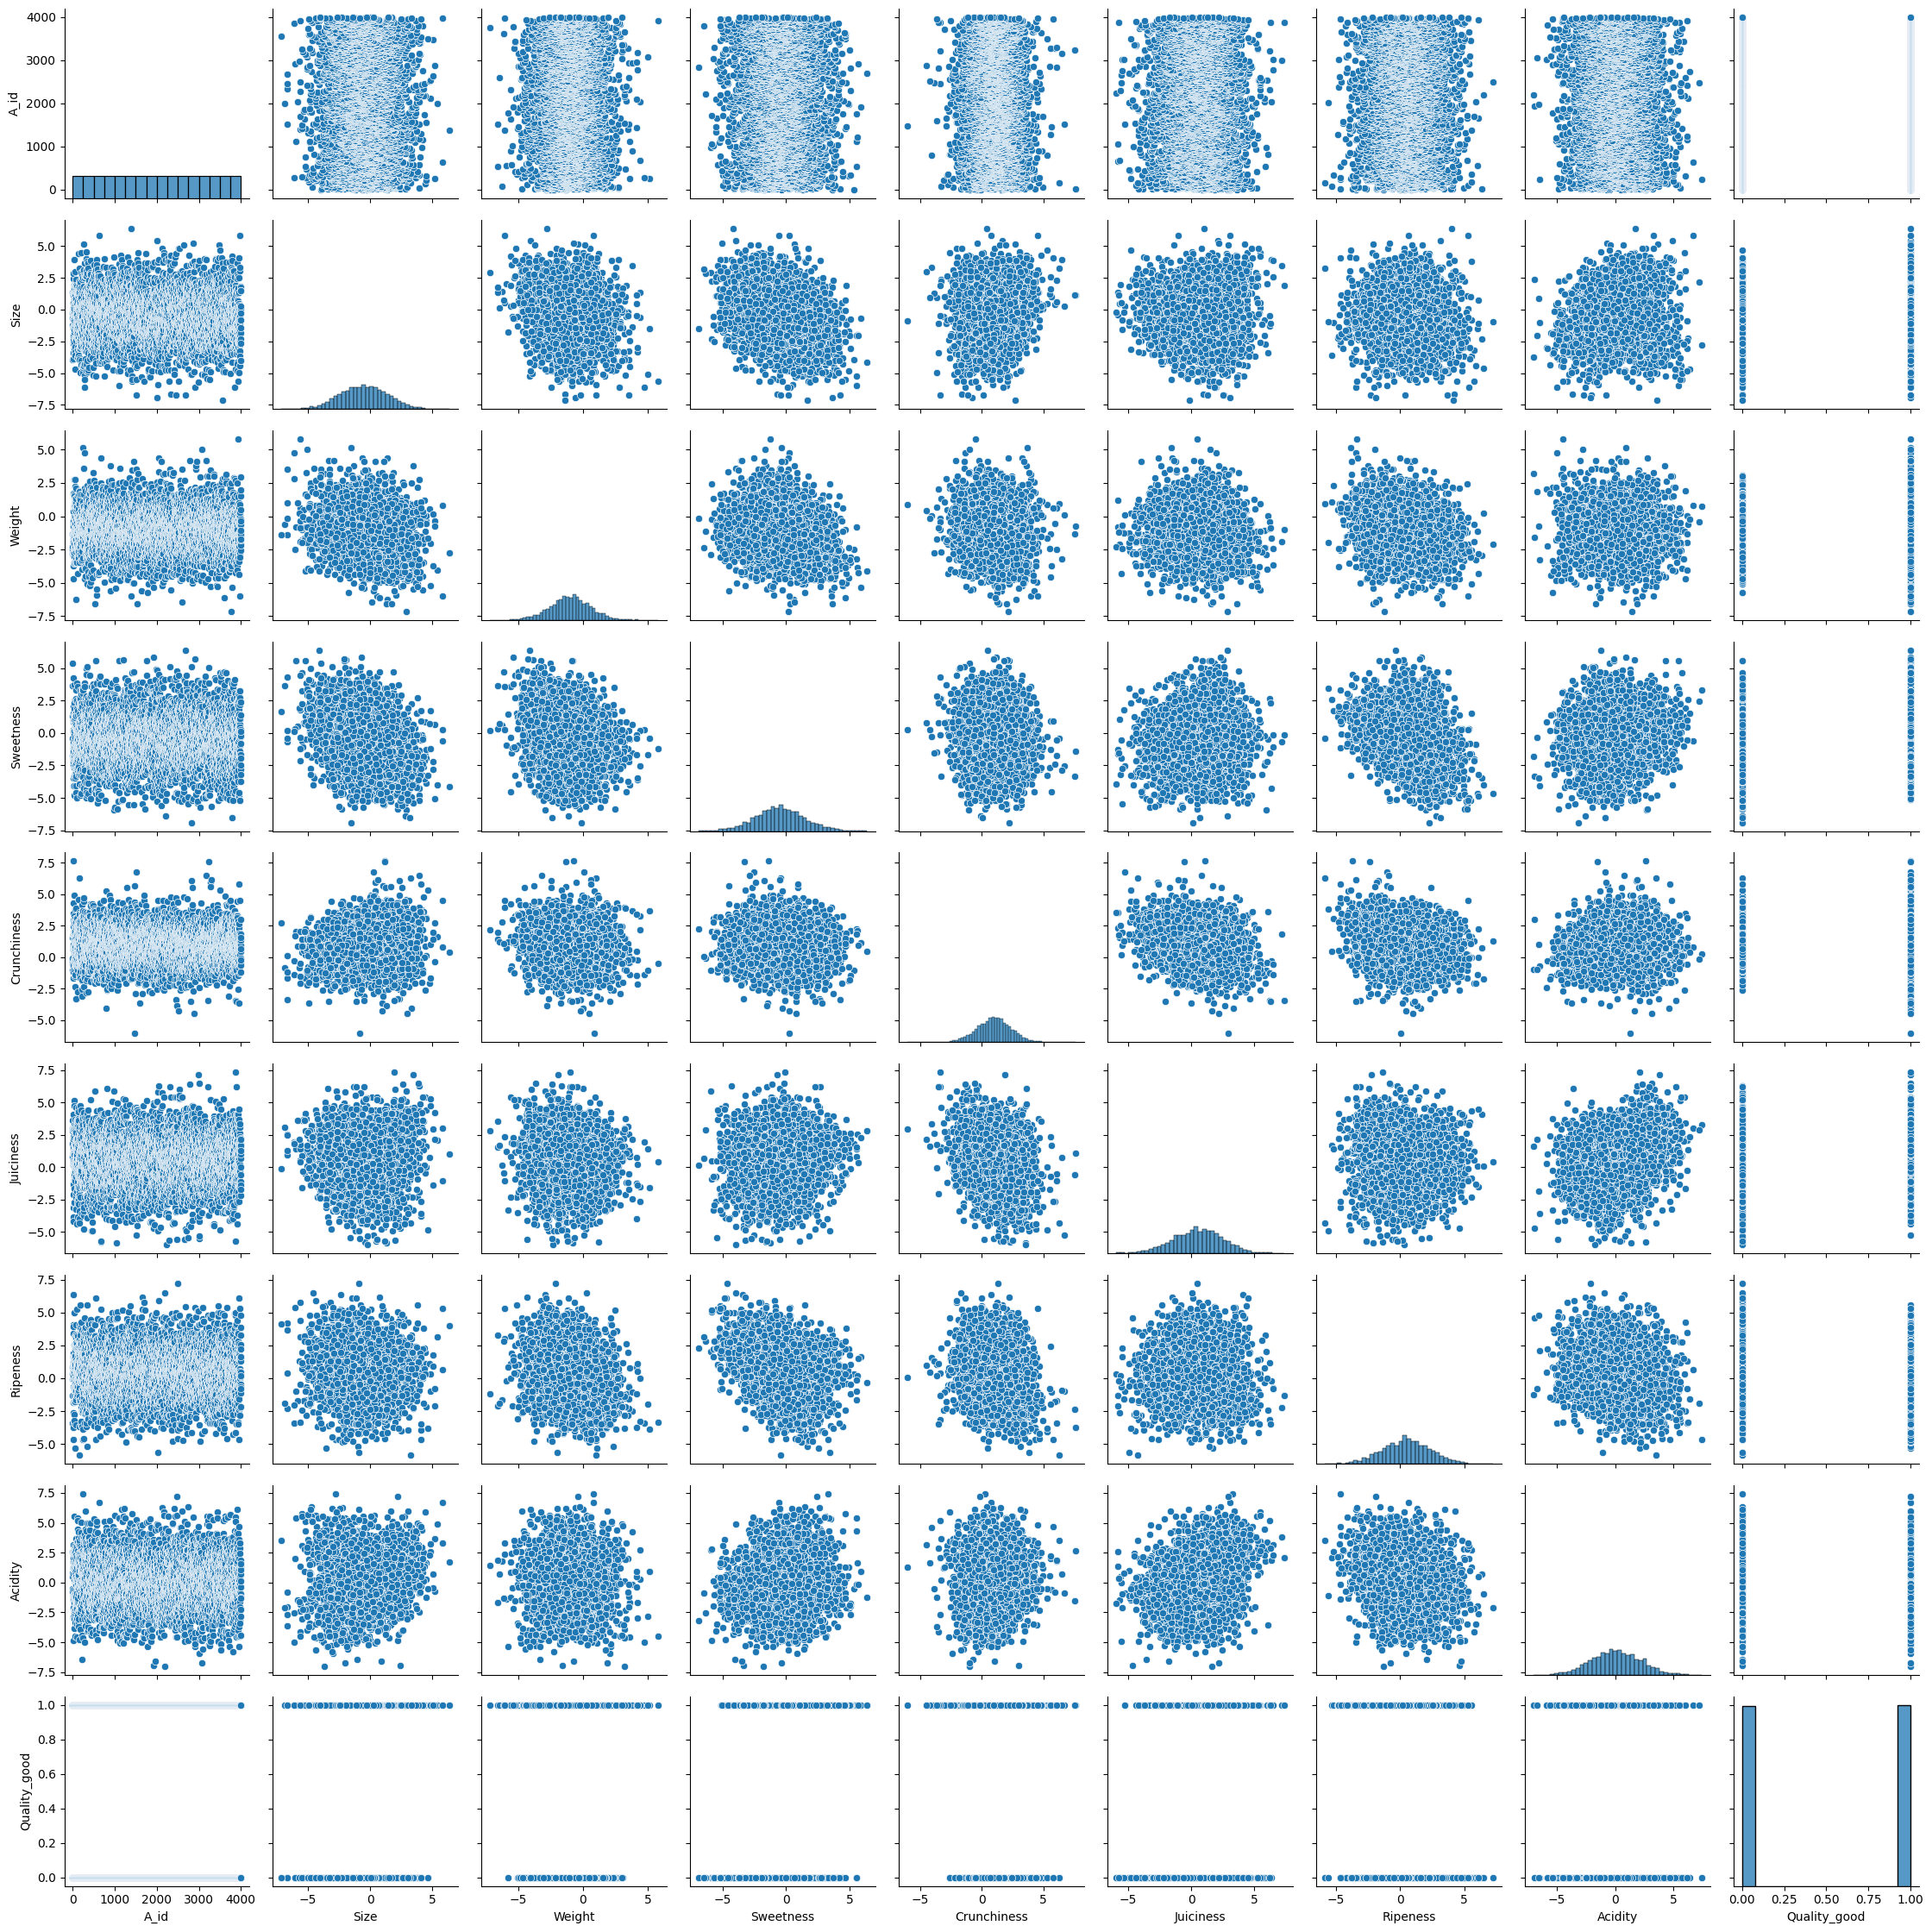

In [376]:
sns.pairplot(data = df)
plt.tight_layout()

In [377]:
df['Sweetness'].describe()

count    4000.000000
mean       -0.470479
std         1.943441
min        -6.894485
25%        -1.738425
50%        -0.504758
75%         0.801922
max         6.374916
Name: Sweetness, dtype: float64

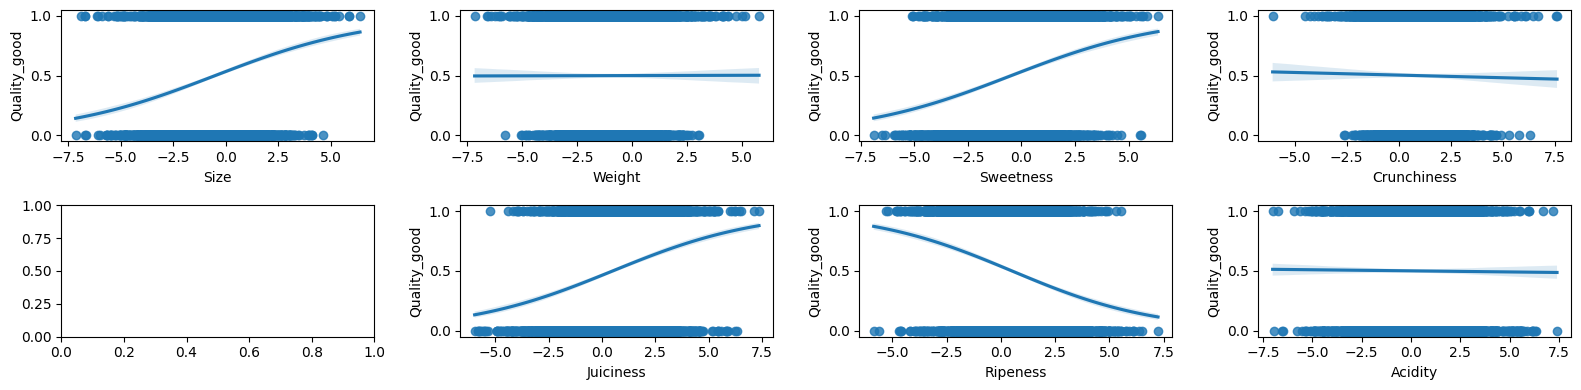

In [378]:
fig, axes = plt.subplots(2,4, figsize = (16,4))

cols_compare = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
for i in range(7):
    if i <= 3:
        j = 0
        k = i
    if i > 3:
        j = 1
        k = i-3
    sns.regplot(data = df, x=cols_compare[i], y=df['Quality_good'], logistic=True, ax=axes[j,k])
plt.tight_layout()

**Modelling**<br>
Those logistics regressions seem to show a correlation between high juiciness and good quality, low ripeness and good quality, high sweetness and good quality, high size and good quality. But we will anyway use all of them for the logistic regression.<br>
<br>
Splitting the data and creating a train and test datasets.

In [379]:
X = df.drop(columns=['Quality_good', 'A_id'])
y = df['Quality_good']

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

**Logistic Regression model**

In [381]:
clf = LogisticRegression().fit(X_train,y_train)
clf.coef_


array([[ 0.65021691,  0.25733347,  0.58911644, -0.01494657,  0.43481839,
        -0.13882428, -0.30718543]])

In [382]:
y_pred_clf = clf.predict(X_test)

In [383]:
accuracy_clf = accuracy_score(y_true=y_test, y_pred=y_pred_clf)
precision_clf = precision_score(y_true=y_test, y_pred=y_pred_clf)
recall_clf = recall_score(y_true=y_test, y_pred=y_pred_clf)
f1_clf = f1_score(y_true=y_test, y_pred=y_pred_clf)

scores = [['accuracy', accuracy_clf],['precision', precision_clf],['recall', recall_clf], ['f1', f1_clf]]
model_comparison = pd.DataFrame(data = scores,columns=['score','clf'])

In [384]:
model_comparison

,score,clf
0,accuracy,0.753333
1,precision,0.753670
2,recall,0.761120
3,f1,0.757377


Accuracy of 75% roughly, not too bad, could probably be better.<br>
let's check the confusion matrix

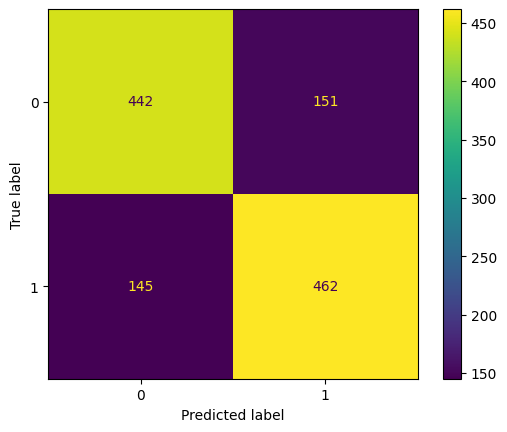

In [385]:
cm = confusion_matrix(y_test, y_pred_clf, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

**Naive Bayes model**

In [386]:
nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [387]:
accuracy_nb = accuracy_score(y_true=y_test, y_pred=y_pred_nb)
precision_nb = precision_score(y_true=y_test, y_pred=y_pred_nb)
recall_nb = recall_score(y_true=y_test, y_pred=y_pred_nb)
f1_nb = f1_score(y_true=y_test, y_pred=y_pred_nb)

model_comparison['nb'] = [accuracy_nb, precision_nb, recall_nb, f1_nb]
model_comparison

,score,clf,nb
0,accuracy,0.753333,0.746667
1,precision,0.753670,0.757216
2,recall,0.761120,0.734761
3,f1,0.757377,0.745819


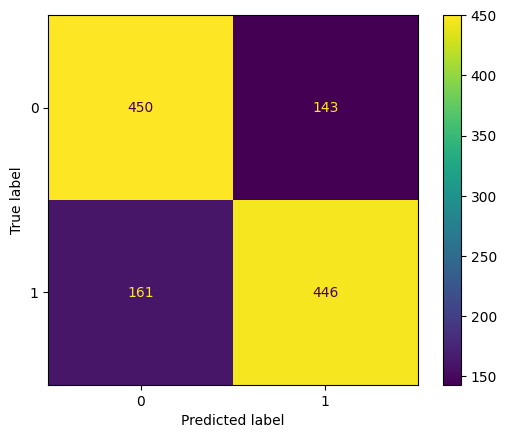

In [388]:
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)

disp.plot()

**Decision Tree**

In [389]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train)

In [390]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_tr, y_tr)
y_pred_dt = decision_tree.predict(X_test)

In [391]:
accuracy_dt = accuracy_score(y_true=y_test, y_pred=y_pred_dt)
precision_dt = precision_score(y_true=y_test, y_pred=y_pred_dt)
recall_dt = recall_score(y_true=y_test, y_pred=y_pred_dt)
f1_dt = f1_score(y_true=y_test, y_pred=y_pred_dt)

model_comparison['dt'] = [accuracy_dt, precision_dt, recall_dt, f1_dt]
model_comparison

,score,clf,nb,dt
0,accuracy,0.753333,0.746667,0.802500
1,precision,0.753670,0.757216,0.804276
2,recall,0.761120,0.734761,0.805601
3,f1,0.757377,0.745819,0.804938


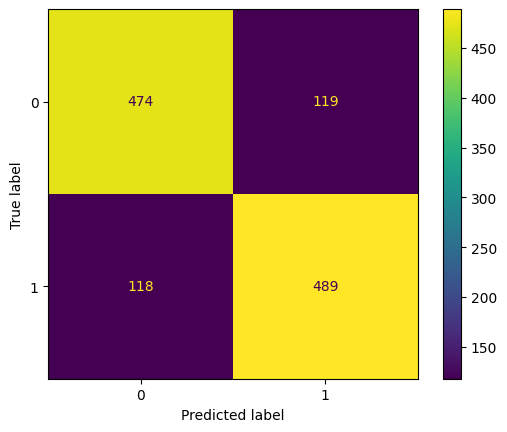

In [392]:
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=decision_tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=decision_tree.classes_)

disp.plot()

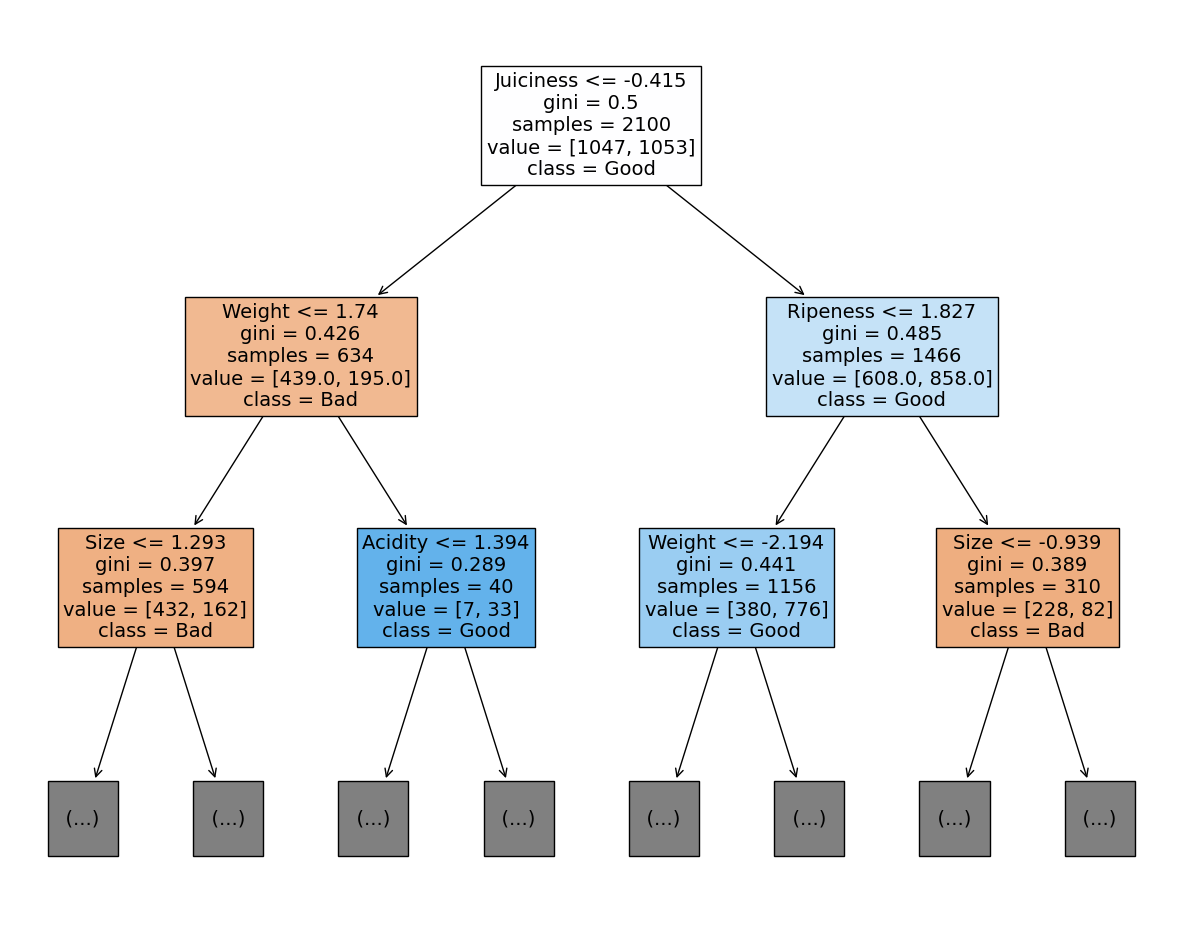

In [393]:
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns,
class_names={0:'Bad', 1:'Good'}, filled=True);
plt.show()

**Tuned Decision Tree**<br>
The resuls from the decision tree are much better already ! Let's tune it to see where we can go.

In [394]:
tuned_decision_tree = DecisionTreeClassifier(random_state=42)

tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}

scoring_items = ['accuracy', 'precision', 'recall', 'f1']

tuned_clf = GridSearchCV(tuned_decision_tree,
                        tree_para,
                        scoring=scoring_items,
                        cv=5,
                        refit='accuracy')

tuned_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [395]:
tuned_clf.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [396]:
final_tuned_tree = DecisionTreeClassifier(max_depth=tuned_clf.best_estimator_.max_depth, min_samples_leaf=tuned_clf.best_estimator_.min_samples_leaf)
final_tuned_tree.fit(X_train,y_train)
y_pred_tuned_tree = final_tuned_tree.predict(X_test)


accuracy_tuned_tree = accuracy_score(y_true=y_test, y_pred=y_pred_tuned_tree)
precision_tuned_tree = precision_score(y_true=y_test, y_pred=y_pred_tuned_tree)
recall_tuned_tree = recall_score(y_true=y_test, y_pred=y_pred_tuned_tree)
f1_tuned_tree = f1_score(y_true=y_test, y_pred=y_pred_tuned_tree)

model_comparison['tuned_tree'] = [accuracy_tuned_tree, precision_tuned_tree, recall_tuned_tree, f1_tuned_tree]
model_comparison

,score,clf,nb,dt,tuned_tree
0,accuracy,0.753333,0.746667,0.802500,0.808333
1,precision,0.753670,0.757216,0.804276,0.801600
2,recall,0.761120,0.734761,0.805601,0.825371
3,f1,0.757377,0.745819,0.804938,0.813312


<Axes: >

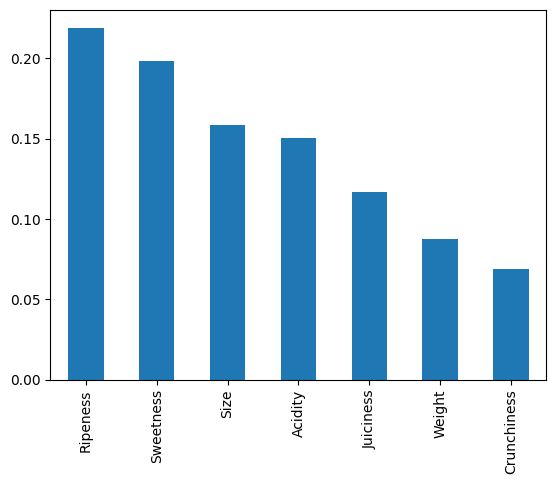

In [397]:
importances = final_tuned_tree.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

**Random Forest**<br>
Alright, tuned decision tree is performing in a similar way. Now let's try set up an untuned random forest and then a tuned random forest.

In [398]:
bare_random_forest = RandomForestClassifier(random_state=42)

bare_random_forest.fit(X_train, y_train)
y_pred_bare_rf = bare_random_forest.predict(X_test)

In [399]:
accuracy_brf = accuracy_score(y_true=y_test, y_pred=y_pred_bare_rf)
precision_brf = precision_score(y_true=y_test, y_pred=y_pred_bare_rf)
recall_brf = recall_score(y_true=y_test, y_pred=y_pred_bare_rf)
f1_brf = f1_score(y_true=y_test, y_pred=y_pred_bare_rf)

model_comparison['brf'] = [accuracy_brf, precision_brf, recall_brf, f1_brf]
model_comparison

,score,clf,nb,dt,tuned_tree,brf
0,accuracy,0.753333,0.746667,0.802500,0.808333,0.896667
1,precision,0.753670,0.757216,0.804276,0.801600,0.899174
2,recall,0.761120,0.734761,0.805601,0.825371,0.896211
3,f1,0.757377,0.745819,0.804938,0.813312,0.897690


**Tuned Random Forest**

In [400]:
random_forest = RandomForestClassifier(random_state=42)
cv_params_rf = {'max_depth': [3,5,None],
                'max_features': [1.0],
                'max_samples': [0.7],
                'min_samples_leaf': [2, 3],
                'min_samples_split': [2, 3],
                'n_estimators': [300, 500]
                }
# Assign a dictionary of scoring metrics to capture

scoring_rf = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf = GridSearchCV(random_forest, cv_params_rf, scoring=scoring_rf, cv=5, refit='roc_auc')

rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [401]:
filename = 'RandomForestOptimized.sav'
pickle.dump(rf, open(filename,'wb'))

In [402]:
accuracy_rf = accuracy_score(y_true=y_test, y_pred=y_pred_rf)
precision_rf = precision_score(y_true=y_test, y_pred=y_pred_rf)
recall_rf = recall_score(y_true=y_test, y_pred=y_pred_rf)
f1_rf = f1_score(y_true=y_test, y_pred=y_pred_rf)

model_comparison['rf'] = [accuracy_rf, precision_rf, recall_rf, f1_rf]
model_comparison

,score,clf,nb,dt,tuned_tree,brf,rf
0,accuracy,0.753333,0.746667,0.802500,0.808333,0.896667,0.895833
1,precision,0.753670,0.757216,0.804276,0.801600,0.899174,0.896382
2,recall,0.761120,0.734761,0.805601,0.825371,0.896211,0.897858
3,f1,0.757377,0.745819,0.804938,0.813312,0.897690,0.897119


Random forest hyperparameter tuning took 41min, could be optimize by reducing the cv (cross validation) to 4 or even 3, but still, it does outperform any other method so far. Accuracy of 89%, that's not too bad. 

<Axes: >

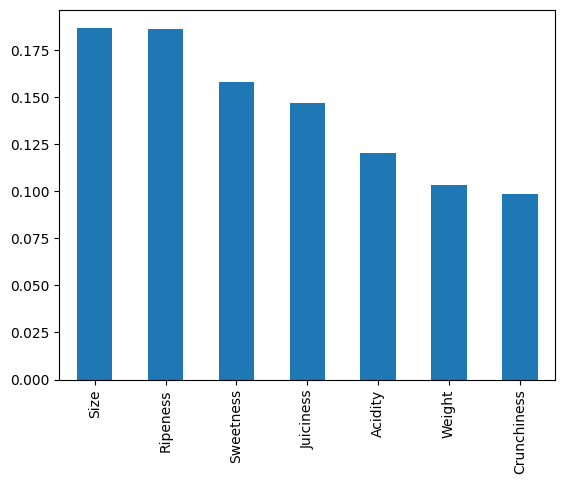

In [403]:
importances = rf.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)

In [404]:
rf.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

**Extreme Gradient Boost**<br>
Funny enough, after tweaking the random forest parameters, the size turns out the be the most important feature and not ripeness anymore. That's interesting. Let's try to see if an XGB classifier could outperform our random forest here.

In [405]:
bare_xgb = XGBClassifier(objective='binary:logistic', random_state=42)
bare_xgb.fit(X_train,y_train)
y_pred_bare_xgb = bare_xgb.predict(X_test)

In [406]:
accuracy_bxgb = accuracy_score(y_true=y_test, y_pred=y_pred_bare_xgb)
precision_bxgb = precision_score(y_true=y_test, y_pred=y_pred_bare_xgb)
recall_bxgb = recall_score(y_true=y_test, y_pred=y_pred_bare_xgb)
f1_bxgb = f1_score(y_true=y_test, y_pred=y_pred_bare_xgb)

model_comparison['bxgb'] = [accuracy_bxgb, precision_bxgb, recall_bxgb, f1_bxgb]
model_comparison

,score,clf,nb,dt,tuned_tree,brf,rf,bxgb
0,accuracy,0.753333,0.746667,0.802500,0.808333,0.896667,0.895833,0.895833
1,precision,0.753670,0.757216,0.804276,0.801600,0.899174,0.896382,0.889968
2,recall,0.761120,0.734761,0.805601,0.825371,0.896211,0.897858,0.906096
3,f1,0.757377,0.745819,0.804938,0.813312,0.897690,0.897119,0.897959


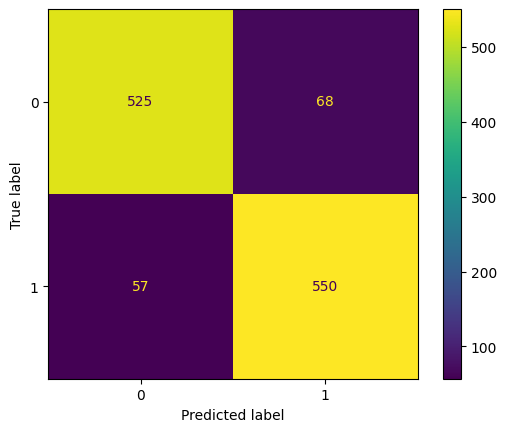

In [407]:
cm_bxgb = confusion_matrix(y_test, y_pred_bare_xgb, labels=bare_xgb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_bxgb, display_labels=bare_xgb.classes_)

disp.plot()

**Tuned Extreme Gradient Boost**<br>
Alright, very good results from the bare xgboost ! Let's tune it and see if we get something better.

In [408]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params_xgb = {'max_depth': [5, 7, 9, 12, None],
                 'min_child_weight': [1, 2, 3, 5],
                 'learning_rate': [0.3],
                 'n_estimators': [100,150,200,250,300,350],
                 'subsample': [0.6,0.7],
                 'colsample_bytree': [0.5,0.6,0.7]
                }

scoring_xgb = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv = GridSearchCV(xgb,
                      cv_params_xgb,
                      scoring=scoring_xgb,
                      cv = 5,
                      refit = 'accuracy'
                      )

In [409]:
xgb_cv.fit(X_train, y_train)
y_pred_xgb = xgb_cv.best_estimator_.predict(X_test)

In [410]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.7}

In [411]:
accuracy_xgb = accuracy_score(y_true=y_test, y_pred=y_pred_xgb)
precision_xgb = precision_score(y_true=y_test, y_pred=y_pred_xgb)
recall_xgb = recall_score(y_true=y_test, y_pred=y_pred_xgb)
f1_xgb = f1_score(y_true=y_test, y_pred=y_pred_xgb)

model_comparison['xgb'] = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]
model_comparison

,score,clf,nb,dt,tuned_tree,brf,rf,bxgb,xgb
0,accuracy,0.753333,0.746667,0.802500,0.808333,0.896667,0.895833,0.895833,0.890833
1,precision,0.753670,0.757216,0.804276,0.801600,0.899174,0.896382,0.889968,0.897993
2,recall,0.761120,0.734761,0.805601,0.825371,0.896211,0.897858,0.906096,0.884679
3,f1,0.757377,0.745819,0.804938,0.813312,0.897690,0.897119,0.897959,0.891286


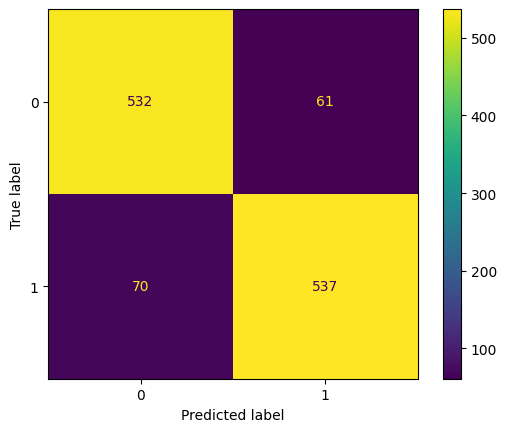

In [412]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=xgb_cv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_cv.classes_)

disp.plot()

**Support Vector Machine**

In [413]:
bare_svm = SVC()
bare_svm.fit(X_train, y_train)
y_pred_bare_svm = bare_svm.predict(X_test)

In [414]:
accuracy_bsvm = accuracy_score(y_true=y_test, y_pred=y_pred_bare_svm)
precision_bsvm = precision_score(y_true=y_test, y_pred=y_pred_bare_svm)
recall_bsvm = recall_score(y_true=y_test, y_pred=y_pred_bare_svm)
f1_bsvm = f1_score(y_true=y_test, y_pred=y_pred_bare_svm)

model_comparison['bsvm'] = [accuracy_bsvm, precision_bsvm, recall_bsvm, f1_bsvm]
model_comparison

,score,clf,nb,dt,tuned_tree,brf,rf,bxgb,xgb,bsvm
0,accuracy,0.753333,0.746667,0.802500,0.808333,0.896667,0.895833,0.895833,0.890833,0.898333
1,precision,0.753670,0.757216,0.804276,0.801600,0.899174,0.896382,0.889968,0.897993,0.900826
2,recall,0.761120,0.734761,0.805601,0.825371,0.896211,0.897858,0.906096,0.884679,0.897858
3,f1,0.757377,0.745819,0.804938,0.813312,0.897690,0.897119,0.897959,0.891286,0.899340


**Tuned Support Vector Machine**

In [415]:
svm = SVC()

cv_params_svm = {'C': [0.7, 1, 1.3],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale']
                }

scoring_svm = ['accuracy', 'precision', 'recall', 'f1']


svm_cv = GridSearchCV(svm, 
                      param_grid= cv_params_svm,
                      cv = 4,
                      scoring=scoring_svm,
                      refit='accuracy'
                      )

svm_cv.fit(X_train,y_train)

y_pred_svm = svm_cv.predict(X_test)

In [416]:
filename_svm = 'SVMOptimized.sav'
pickle.dump(rf, open(filename_svm,'wb'))

In [417]:
svm_cv.best_params_

{'C': 1.3, 'gamma': 'scale', 'kernel': 'rbf'}

In [418]:
accuracy_svm = accuracy_score(y_true=y_test, y_pred=y_pred_svm)
precision_svm = precision_score(y_true=y_test, y_pred=y_pred_svm)
recall_svm = recall_score(y_true=y_test, y_pred=y_pred_svm)
f1_svm = f1_score(y_true=y_test, y_pred=y_pred_svm)

model_comparison['svm'] = [accuracy_svm, precision_svm, recall_svm, f1_svm]
model_comparison

,score,clf,nb,dt,tuned_tree,brf,rf,bxgb,xgb,bsvm,svm
0,accuracy,0.753333,0.746667,0.802500,0.808333,0.896667,0.895833,0.895833,0.890833,0.898333,0.898333
1,precision,0.753670,0.757216,0.804276,0.801600,0.899174,0.896382,0.889968,0.897993,0.900826,0.904841
2,recall,0.761120,0.734761,0.805601,0.825371,0.896211,0.897858,0.906096,0.884679,0.897858,0.892916
3,f1,0.757377,0.745819,0.804938,0.813312,0.897690,0.897119,0.897959,0.891286,0.899340,0.898839


In terms of accuracy, SVM is the models that performs best. We do not notice a significant improvement from the bare and tuned model though.

**Sum up**<br>
We have performed cleaning, transformation and analysis on our data before applying different type of classification methods that lead us to a prediction accuracy of 89%, which is close to excellent. 